# URL Phishing Project

# GITHUB URL: https://github.com/kempensp/PhishingURL
## Project Goals
This project is a supervised machine learning project intended to develop a classification model to identify whether URLs are legitimate or phishing.  This project will evaluate model options including KNN, Decision Trees, and Ensembles to determine a strong model to use in the future. As a computer science teacher, this will be a useful tool to assist my students in identifying whether a website is likely to be suspicious from a cybersecurity perspective.

## Dataset
The dataset I will be useful is available on Kaggle at https://www.kaggle.com/datasets/danielfernandon/web-page-phishing-dataset with Creative Commons permissions https://creativecommons.org/licenses/by/4.0/ <br>

Fernando, D. (2024). Web Page Phishing Dataset. https://www.kaggle.com/datasets/danielfernandon/web-page-phishing-dataset, derived from: <br>Hannousse, Abdelhakim; Yahiouche, Salima (2021), “Web page phishing detection”, Mendeley Data, V3, doi: 10.17632/c2gw7fy2j4.3 <br>Vrbančič, Grega (2020), “Phishing Websites Dataset”, Mendeley Data, V1, doi: 10.17632/72ptz43s9v.1

The Web Page Phishing Dataset merges the Hannousee/Yahiouche and Vrbancic datasets and selects 19 numerical features of URLs with a 20th feature which is the classification of the URLs as phishing or legitimate.  From the Fernando documentation, features include the length of the URL, then the number of dots, hyphens, underscores, slashes, question marks, equal signs, at signs, ampersands, exclamation points, spaces, tildes, commas, plus signs, asterisks, hashtag signs, dollar signs, percent signs, and redirections, along with a phishing classification. <br>
This is an approximately 4MB set with 100,077 rows of data. Importing the dataset and viewing the head gives us:


In [1]:
# Importing pandas module for initial look at dataset
import pandas as pd
df = pd.read_csv('web-page-phishing.csv')
# showing the number of rows
print(df.shape[0])



100077


In [2]:
# showing the head of the dataframe
df.head()

,url_length,n_dots,n_hypens,n_underline,n_slash,n_questionmark,n_equal,n_at,n_and,n_exclamation,n_space,n_tilde,n_comma,n_plus,n_asterisk,n_hastag,n_dollar,n_percent,n_redirection,phishing
0,37,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,77,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1
2,126,4,1,2,0,1,3,0,2,0,0,0,0,0,0,0,0,0,1,1
3,18,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
4,55,2,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0


## Data Cleaning
To confirm that the dataset is clean, we will check first for NA values

In [3]:
df.dropna()

,url_length,n_dots,n_hypens,n_underline,n_slash,n_questionmark,n_equal,n_at,n_and,n_exclamation,n_space,n_tilde,n_comma,n_plus,n_asterisk,n_hastag,n_dollar,n_percent,n_redirection,phishing
0,37,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,77,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1
2,126,4,1,2,0,1,3,0,2,0,0,0,0,0,0,0,0,0,1,1
3,18,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
4,55,2,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100072,23,3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
100073,34,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0
100074,70,2,1,0,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
100075,28,2,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


We then check for imbalance and suspicious values

In [4]:
#Check columns for suspicious values
for column in df.columns:
    print()
    print (pd.Series(df[column]).value_counts().sort_index(ascending=True))
    print()


url_length
4         2
5        21
6        73
7       175
8       287
       ... 
1307      1
1386      2
1641      1
1962      1
4165      1
Name: count, Length: 490, dtype: int64


n_dots
1     17187
2     59827
3     15636
4      4545
5      1373
6       534
7       266
8       141
9        71
10       53
11       32
12       35
13       44
14      145
15       91
16       48
17       22
18        7
19        2
20        3
22        5
23        1
24        9
Name: count, dtype: int64


n_hypens
0     80011
1     12835
2      3288
3      1329
4       805
5       533
6       350
7       255
8       177
9       127
10      107
11       76
12       48
13       35
14       22
15       15
16        9
17       13
18        5
19        5
20        6
21        5
23        3
24        5
25        2
26        3
27        1
28        1
31        2
32        1
34        1
35        1
43        1
Name: count, dtype: int64


n_underline
0     93053
1      4011
2      1676
3       628
4       287

While there are imbalances in many of the individual features, this will make sense in the context of URLs and identifying suspicious phishing URLs. The classification feature has about 64% legitimate and 36% phishing URLs. However, the fact that there are a number of rows with a -1 in the redirection column is a potential problem.

<Axes: ylabel='n_redirection'>

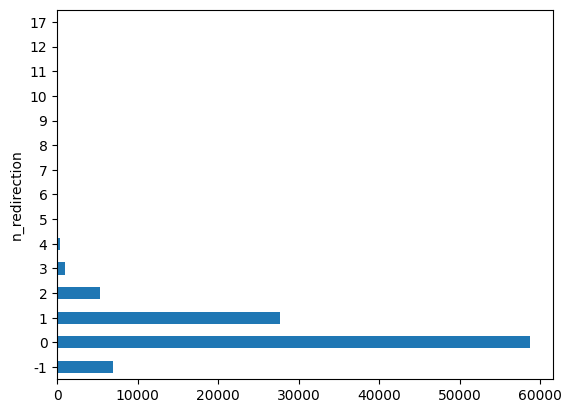

In [5]:
#Visualization to further examine the n_redirection values
redirectvalues=pd.Series(df['n_redirection']).value_counts().sort_index(ascending=True)
redirectvalues.plot.barh()

Having examined the two component datasets, I have found that the -1 value occurs only in the Vrbančič data.  I have decided to remove those rows.

In [6]:
#dropping rows whose n_redirection value is -1
df = df.drop(df[df['n_redirection'] < 0].index)
print(df.shape[0])


93128


## Exploratory Data Analysis
### Basic Bar graphs
With the cleaning of the data with suspect n_redirection values, we can look at each feature:


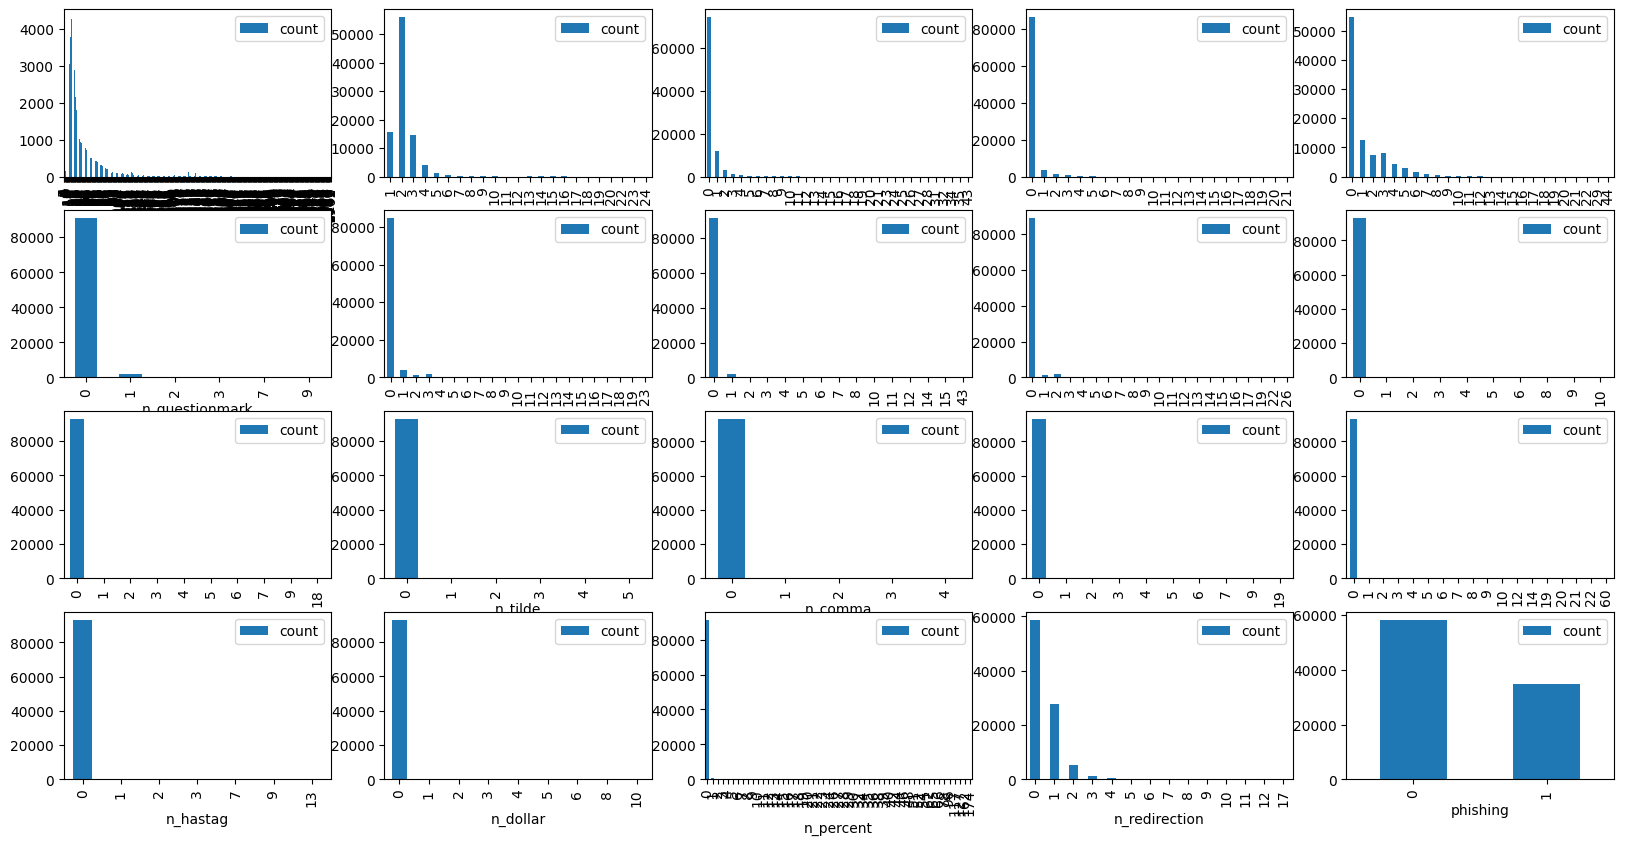

In [7]:
import matplotlib.pyplot as plt
columns=df.columns
row_num = 4
col_num = 5

#Getting a grid of bar plots for counts on each feature
fig, axes = plt.subplots(row_num, col_num, squeeze=False, figsize=(20,10))

row_n = -1
for ix, col in enumerate(columns):

    col_n = ix % col_num
    if col_n == 0:
        row_n = row_n + 1
    col_count=(pd.Series(df[col]).value_counts().sort_index(ascending=True))
    df_col_count=pd.DataFrame(col_count)
    df_col_count.plot(ax=axes[row_n,col_n], kind='bar')
   

plt.show()

Many of the prospective features have a vast majority of their values at zero, and will likely have a potential importance if they are nonzero for a particular url.  Some of the prospective features that can use a further look include:

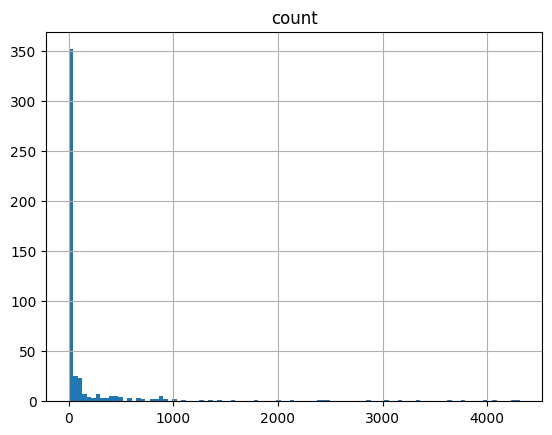

In [8]:
#Visualization to further examine url_length
urllengthvalues=pd.Series(df['url_length']).value_counts().sort_index(ascending=True)
urlhist=pd.DataFrame(urllengthvalues).hist(bins=100)


Url Length will likely be an important feature in our model

<Axes: ylabel='n_dots'>

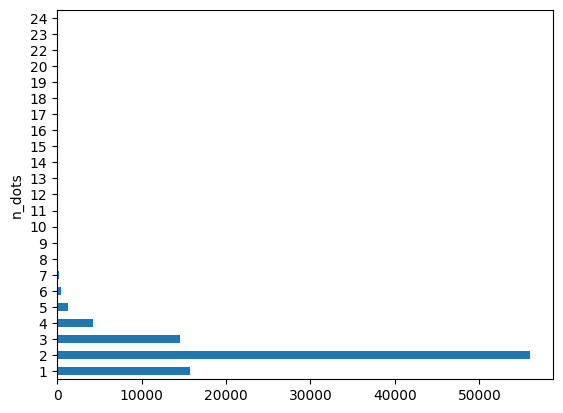

In [9]:
#Visualization to further examine the n_dots values
dotsvalues=pd.Series(df['n_dots']).value_counts().sort_index(ascending=True)
dotsvalues.plot.barh()

<Axes: ylabel='n_slash'>

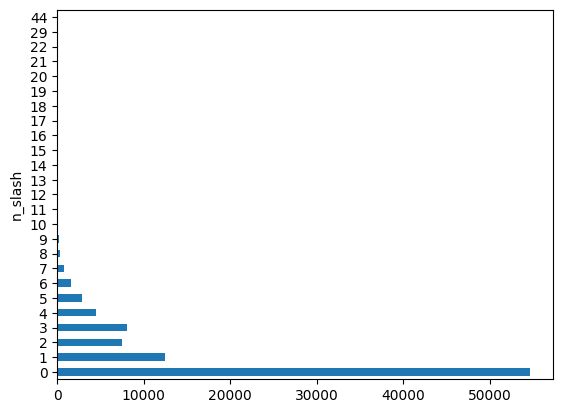

In [10]:
#Visualization to further examine the n_slash values
slashvalues=pd.Series(df['n_slash']).value_counts().sort_index(ascending=True)
slashvalues.plot.barh()

Dots and slash counts will likely have predictive relevance in our model at first glance.

<Axes: ylabel='n_redirection'>

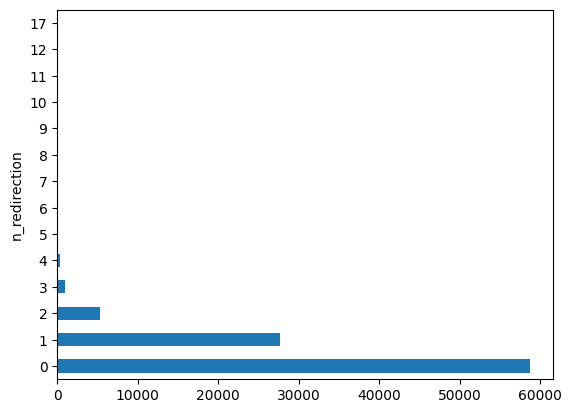

In [11]:
#Visualization to further examine the n_redirection values
redirectvalues=pd.Series(df['n_redirection']).value_counts().sort_index(ascending=True)
redirectvalues.plot.barh()

Redirections may have predictive value particularly if there are multiple redirections.

                url_length    n_dots  n_hypens  n_underline   n_slash  \
url_length        1.000000  0.458636  0.411811     0.434902  0.454237   
n_dots            0.458636  1.000000  0.104769     0.172194  0.200479   
n_hypens          0.411811  0.104769  1.000000     0.177676  0.198819   
n_underline       0.434902  0.172194  0.177676     1.000000  0.180827   
n_slash           0.454237  0.200479  0.198819     0.180827  1.000000   
n_questionmark    0.357099  0.358899  0.086451     0.180715  0.043639   
n_equal           0.642632  0.491477  0.159389     0.352166  0.248584   
n_at              0.161703  0.170393  0.031990     0.053229  0.095027   
n_and             0.573937  0.538353  0.121585     0.277168  0.183427   
n_exclamation     0.049313  0.001967  0.009848     0.053517  0.027667   
n_space           0.060233  0.017820  0.031005     0.011733 -0.012368   
n_tilde           0.107709  0.029403  0.009671     0.037408  0.059876   
n_comma           0.016527  0.020787  0.010002     

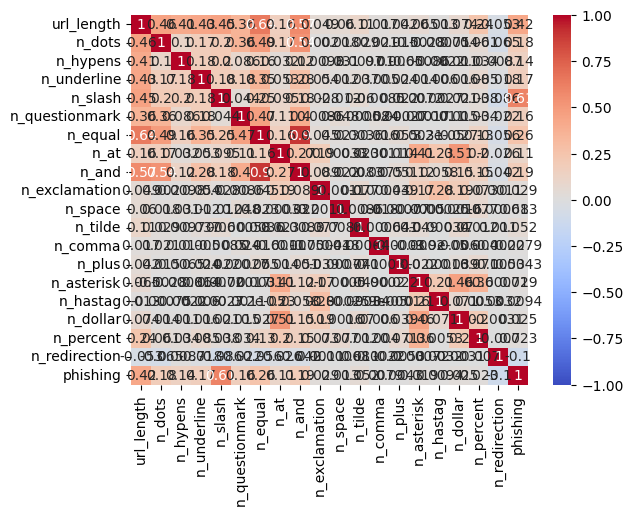

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create heatmap
corr_matrix = df.corr()
print(corr_matrix)
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, center=0)
plt.show()

The correlation matrix suggests potential for collinearity between the URL length and several punctuation marks like dots, hyphens, underlines, slashes, and ampersands.  Given how URLs are structured, this would be somewhat expected; it appears that the highest correlation between potential predictors is about 0.65.  Since this is a classification problem, some caution will be needed when looking at predictor selection.

## Modeling
As this is a classification problem, we can consider KNN, Decision Trees, and Ensembles as potential models.
### KNN consideration
We'll begin by looking at a KNN model.  As we have over 93000 rows in our cleaned data set, we will split the data with 25% of data in the test set and the remainder in the training set.

In [13]:
#Setting our predictors and our classification variables
y = df['phishing']
X = df.drop(['phishing'], axis = 1)
#Separating our training and validation data
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
SEED = 1910
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=SEED)
#Confirm the shape of our training and validation data
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

#Create KNN Classifier
neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(X_train, y_train)
neigh.score(X_test, y_test)


(69846, 19)
(23282, 19)
(69846,)
(23282,)


0.8794347564642213

This gives us a score of just under 0.88.  It would be worthwhile to consider whether modifying the number of neighbors can give us greater accuracy:

In [14]:
#KNN Classifier for 5 neighbors
neigh5 = KNeighborsClassifier(n_neighbors=5)
neigh5.fit(X_train, y_train)
neigh5.score(X_test, y_test)


0.8838587750193282

In [15]:
#KNN Classifier for 7 neighbors
neigh7 = KNeighborsClassifier(n_neighbors=7)
neigh7.fit(X_train, y_train)
neigh7.score(X_test, y_test)

0.8839446782922429

In [16]:
#KNN Classifier for 15 neighbors
neigh15 = KNeighborsClassifier(n_neighbors=15)
neigh15.fit(X_train, y_train)
neigh15.score(X_test, y_test)

0.8829138390172666

While using 5 neighbors has a slight increase in the scoring, going from 5 to 7 neighbors gives us a minimal improvement to 0.884 and  15 neighbors diminishes the score to 0.882

In [17]:
#Looping results for KNN neighbors between 6 and 20
for n in range(6,21):
    neighn=KNeighborsClassifier(n_neighbors=n)
    neighn.fit(X_train, y_train)
    print("Neighbors=",n,"Score=",neighn.score(X_test, y_test))

Neighbors= 6 Score= 0.8837299201099562
Neighbors= 7 Score= 0.8839446782922429
Neighbors= 8 Score= 0.8848037110213899
Neighbors= 9 Score= 0.8835151619276694
Neighbors= 10 Score= 0.8836440168370415
Neighbors= 11 Score= 0.8847178077484752
Neighbors= 12 Score= 0.8835151619276694
Neighbors= 13 Score= 0.8846748561120179
Neighbors= 14 Score= 0.8821407095610343
Neighbors= 15 Score= 0.8829138390172666
Neighbors= 16 Score= 0.8833863070182973
Neighbors= 17 Score= 0.8841164848380724
Neighbors= 18 Score= 0.882484322652693
Neighbors= 19 Score= 0.883214500472468
Neighbors= 20 Score= 0.8818829997422902


From these results, a KNN model with n_neighbors=8 gives us the best score of 0.8848037110213899

## Logistic Regression
We can consider a logisitic regression model and examine the corresponding score

In [18]:
#Base logistic regression
from sklearn.linear_model import LogisticRegression
clflogreg=LogisticRegression(random_state=0).fit(X_train,y_train)
clflogreg.score(X_test, y_test)

C:\Users\spkem\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.8548234687741603

In [19]:
#Logistic regression model considering scaling the data...
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
min_max_scaler = preprocessing.MinMaxScaler()
X_train_minmax = min_max_scaler.fit_transform(X_train)
X_test_minmax = min_max_scaler.fit_transform(X_test)
clflogreg=LogisticRegression(random_state=0).fit(X_train_minmax,y_train)
clflogreg.score(X_test_minmax, y_test)

0.8354522807318959

Using the Logistic Regression model does not give us a greater score.

## Decision Trees
We will consider the sklearn DecisionTreeClassifer.  For comparison, we will use the same test and validation data split and begin with a default Classifier:

In [20]:
#Set a basic Decision Tree Classifier
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(random_state=0)
clf.fit(X_train,y_train)
clf.score(X_test,y_test)

0.8846319044755605

In [21]:
#Set a Decision Tree Classifier with adjusting max features to 10
clfm10 = DecisionTreeClassifier(max_features=10,random_state=0)
clfm10.fit(X_train,y_train)
clfm10.score(X_test,y_test)

0.8855768404776222

In [22]:
#Set a Decision Tree Classifier with adjusting max features to 5
clfm5 = DecisionTreeClassifier(max_features=5,random_state=0)
clfm5.fit(X_train,y_train)
clfm5.score(X_test,y_test)

0.8863929215703118

In [23]:
#Set a Decision Tree Classifier with adjusting max features to 3
clfm3 = DecisionTreeClassifier(max_features=3,random_state=0)
clfm3.fit(X_train,y_train)
clfm3.score(X_test,y_test)

0.8842023881109871

Altering the number of features gives us scores slightly higher than the KNN model with max_features at 5

In [24]:
#Set a Decision Tree Classifier with using the entropy criterion
clfe = DecisionTreeClassifier(criterion="entropy",random_state=0)
clfe.fit(X_train,y_train)
clfe.score(X_test,y_test)

0.8842023881109871

In [25]:
# Looping over maximum features of DTCs
print("Gini DTC Classifiers")
for n in range(1,20):
    clfmn=DecisionTreeClassifier(max_features=n,random_state=0)
    clfmn.fit(X_train, y_train)
    print("Max Features=",n,"Score=",clfmn.score(X_test, y_test))
    
# With a similar loop using the Entropy Criterion
print("Entropy DTC Classifiers")
for n in range(1,20):
    clfmn=DecisionTreeClassifier(max_features=n,random_state=0,criterion="entropy")
    clfmn.fit(X_train, y_train)
    print("Max Features=",n,"Score=",clfmn.score(X_test, y_test))

Gini DTC Classifiers
Max Features= 1 Score= 0.8842882913839017
Max Features= 2 Score= 0.8853620822953354
Max Features= 3 Score= 0.8842023881109871
Max Features= 4 Score= 0.8853620822953354
Max Features= 5 Score= 0.8863929215703118
Max Features= 6 Score= 0.885791598659909
Max Features= 7 Score= 0.8841594364745297
Max Features= 8 Score= 0.8845030495661885
Max Features= 9 Score= 0.8844600979297311
Max Features= 10 Score= 0.8855768404776222
Max Features= 11 Score= 0.8848466626578473
Max Features= 12 Score= 0.8853191306588781
Max Features= 13 Score= 0.8848037110213899
Max Features= 14 Score= 0.8847607593849326
Max Features= 15 Score= 0.8837728717464135
Max Features= 16 Score= 0.8846748561120179
Max Features= 17 Score= 0.885791598659909
Max Features= 18 Score= 0.884073533201615
Max Features= 19 Score= 0.8846319044755605
Entropy DTC Classifiers
Max Features= 1 Score= 0.8856197921140796
Max Features= 2 Score= 0.8850614208401341
Max Features= 3 Score= 0.8855338888411648
Max Features= 4 Score= 0

This will confirm that using Max Features parameter of 5 and staying with the default gini criterion gives us the best current score at .886

## Adaboost and Random Forests
The Decision Tree gave us a slightly better performance.  Perhaps using Adaboost will provide an improvement...

In [26]:
#Training and testing an AdaBoost Classifier
from sklearn.ensemble import AdaBoostClassifier
clfada = AdaBoostClassifier(random_state=0)
clfada.fit(X_train, y_train)
clfada.score(X_test,y_test)

C:\Users\spkem\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


0.8682673309853105

In fact, the Adaboost classifier did not work as well as either the KNN or Decision Tree

In [27]:
#Training and testing a RandomForestClassifer with depth 2
from sklearn.ensemble import RandomForestClassifier
clfrfc = RandomForestClassifier(max_depth=2, random_state=0)
clfrfc.fit(X, y)
clfrfc.score(X_test,y_test)

0.8369985396443604

In [28]:
#Training and testing a RandomForestClassifer with depth 5
clfrfcd5 = RandomForestClassifier(max_depth=5, random_state=0)
clfrfcd5.fit(X, y)
clfrfcd5.score(X_test,y_test)

0.8552529851387338

In [29]:
#Training and testing a RandomForestClassifer with no max depth
clfrfcdmax = RandomForestClassifier(random_state=0)
clfrfcdmax.fit(X, y)
clfrfcdmax.score(X_test,y_test)

0.9205394725539043

In [30]:
#Training and testing a RandomForestClassifer with no max depth, using only the training split for fitting.
clfrfcdmax = RandomForestClassifier(random_state=0)
clfrfcdmax.fit(X_train, y_train)
clfrfcdmax.score(X_test,y_test)

0.8921913924920539

## Summary of results
The RandomForestClassifer appears to give us the best model performance score so far at a 0.89 restricting the training and validation data to the split set used for KNN and Decision Tree approaches.  This appears to give us the best overall performance reducing the overfit risks compared to the other attempts at models that we have previously used.

-RFC score=0.8921913924920539 (with 0.9205394725539043 using the full data as a training set, but lower scores for setting max_depth)
-Adaboost score=0.8682673309853105
-Decision tree score=0.8863929215703118 with Max features=5 and using the gini criterion
-KNN with 8 neighbors score=0.8848037110213899
-Logistic regression unscaled score=0.8548234687741603
-Logisitc regression scaled score=0.8354522807318959

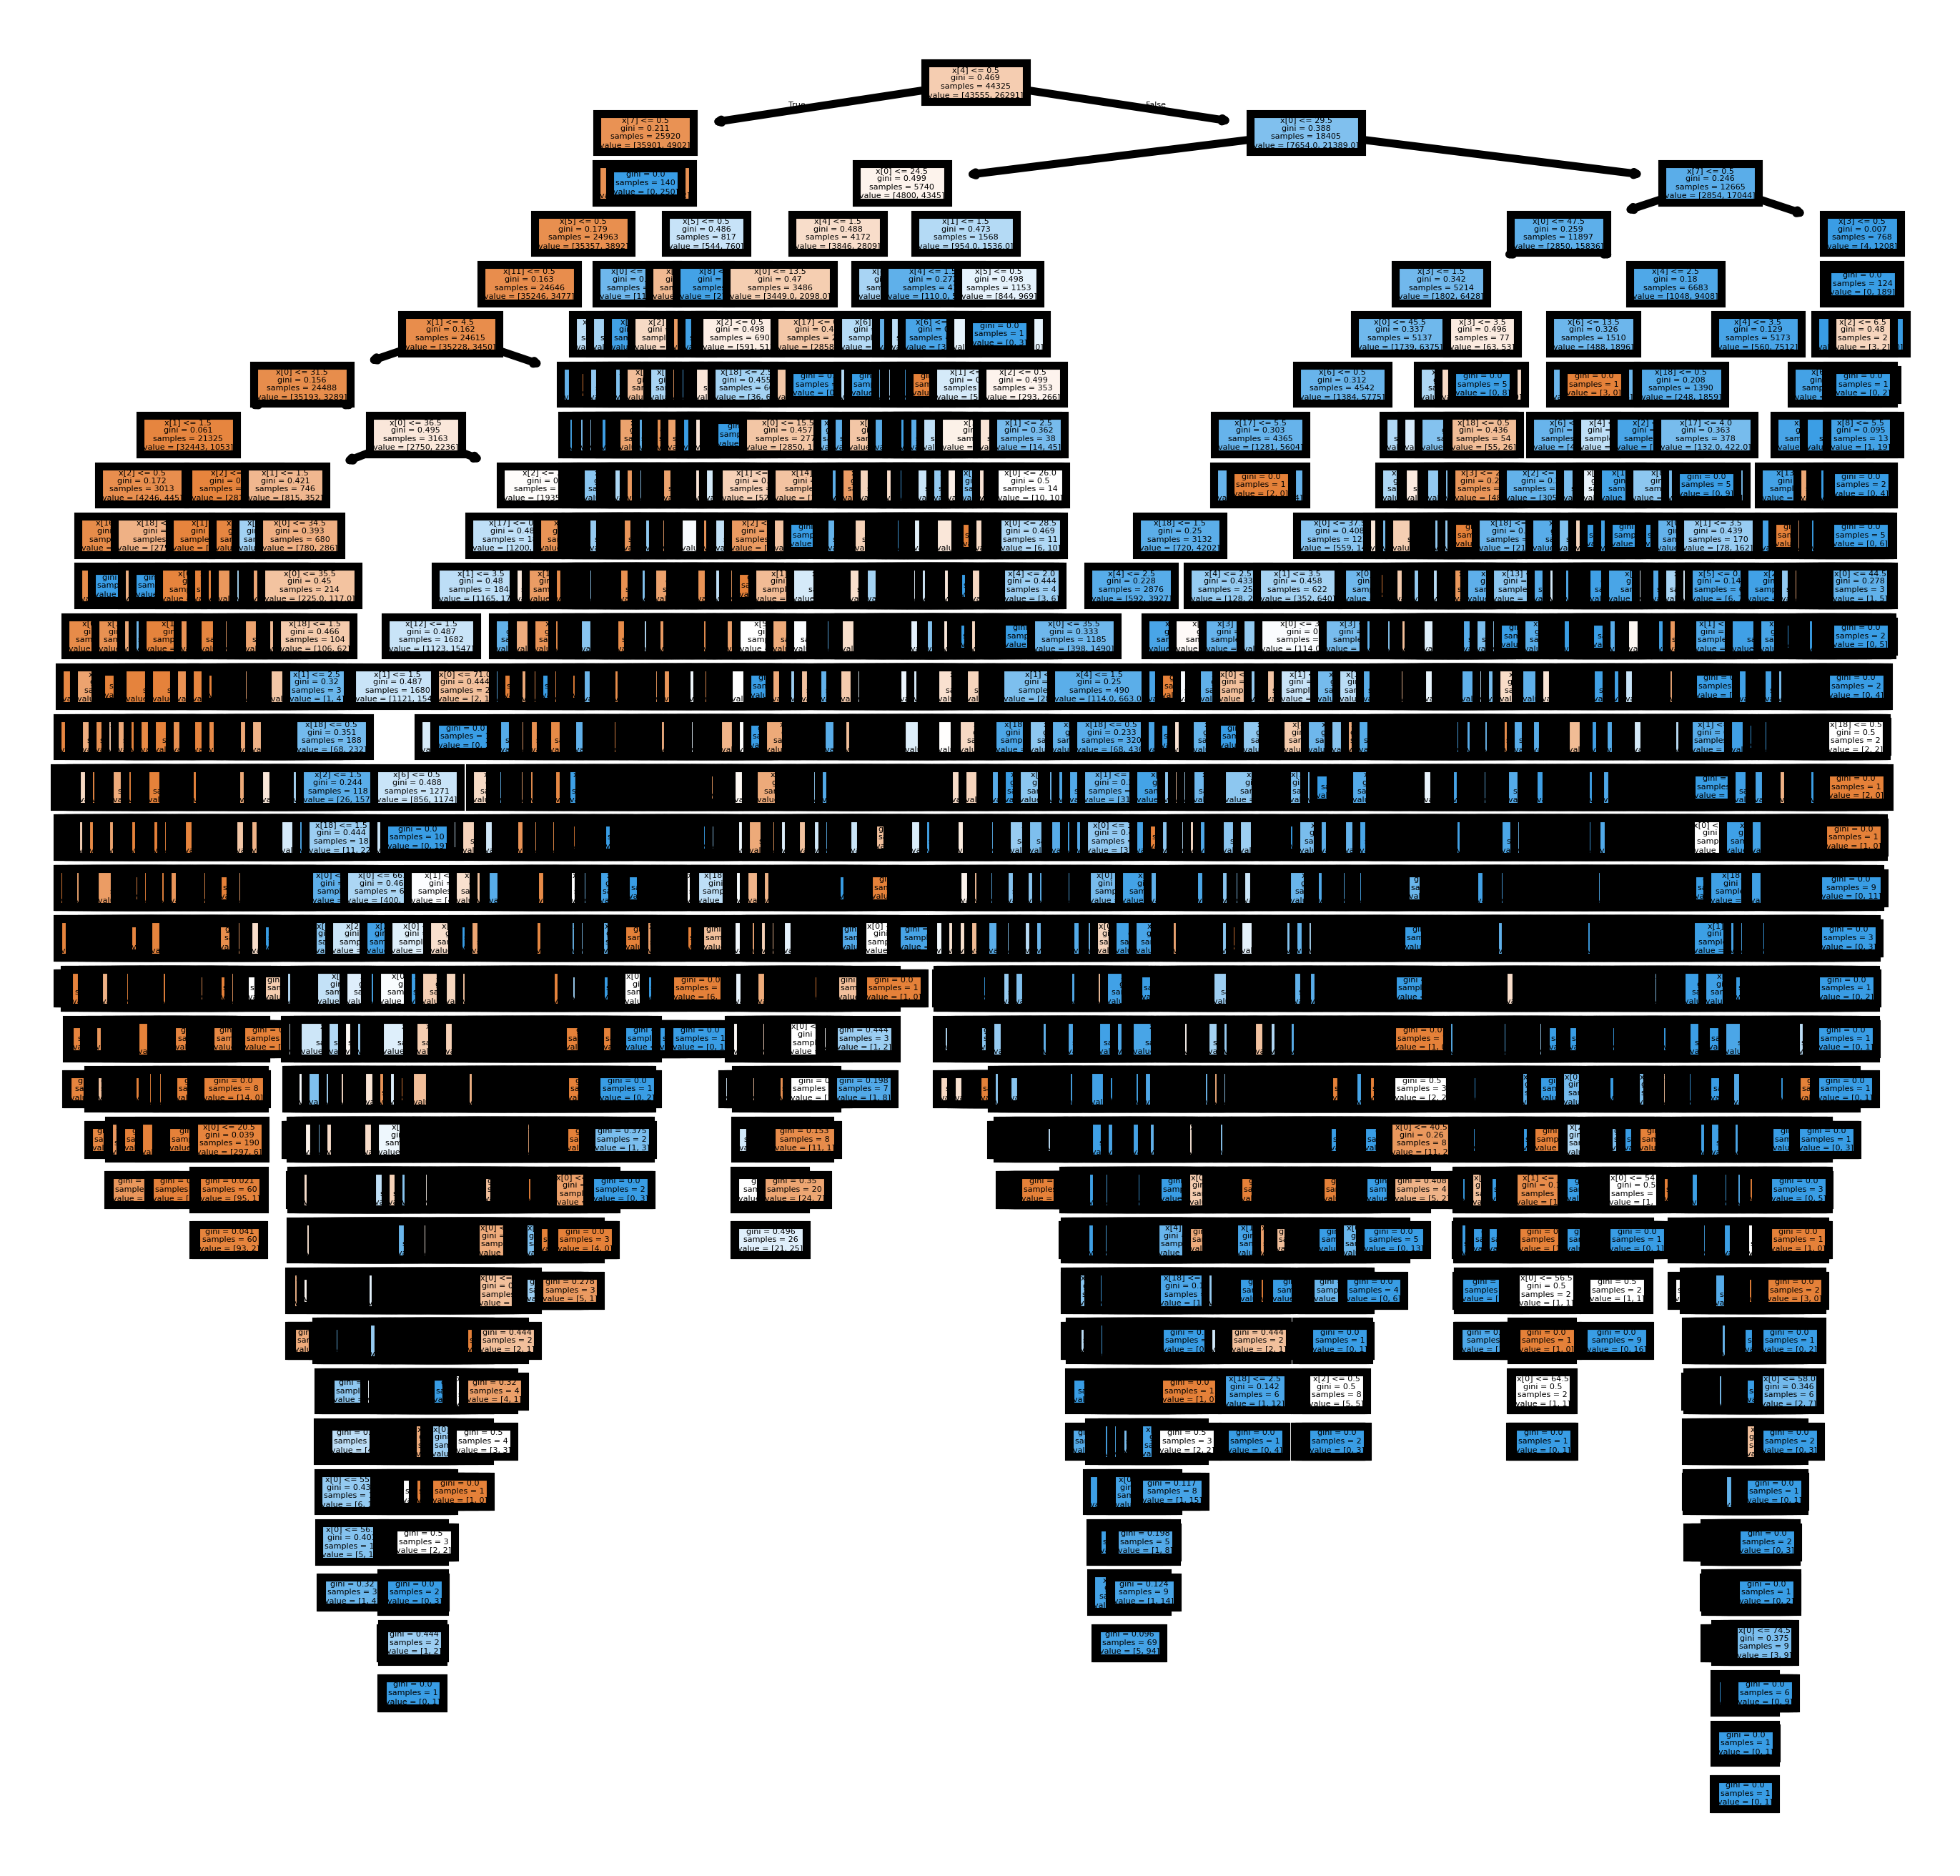

In [32]:
#Plotting first tree in random forest classifier
from sklearn import tree
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=800)
tree.plot_tree(clfrfcdmax.estimators_[0],
               filled = True);

## Reflections and Conclusions
- The fact that the random forest classifier provided the highest scoring among the models examined probably should not be surprise, though the weaker performance of the Adaboost classifer was.  Further consideration and tuning of the learning rate or the use of a gradient classifer could be an additional item to consider in future examination of this data.
- I did have to be mindful of setting an random_state value to maintain replicability of my testing results, especially with the Decision Tree Classifiers.
- Leaving the max_depth parameter undefined made a significant difference in the scoring of the random forest classifier making it the stronger of the models
- Having the max_features at 5 providing a maximum score with the decision tree classifiers was a bit suprising, possibly a check on overfitting in DTCs
- The n_percent feature appears to have an outlier value that would strongly suggest a phishing site, but a reanalysis of these models where restricting the features to url_length, dots, slashes, and perhaps rescaling the remaining features to a boolean 1/0 feature based on the presence or absence of the characters in question would provide a cleaner set of models to compare
- The redirection feature is still unclear to me; while I tried to address it with dropping the confusing redirects=-1 data from one of the data subsets, another alternative would have been to drop the feature entirely.